<a href="https://colab.research.google.com/github/edmenciab733/ucom-project3/blob/main/nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aspectos Generales




In [1]:
import pandas as pd
from  google.colab import drive 

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/My Drive/ML/reviews_original.csv", sep="|",  engine="python")

In [5]:
from sklearn.utils import shuffle
df_test = shuffle(data)

df_test.head()

,estrella,texto,lugar
391,30,es un lugar bonito y sencillo. no hay lujos ni...,palacio
3109,50,Ideal para pasar el dia en familia y con amigo...,botanico
1262,40,me parece genial el lugar para las actividades...,costanera
2753,40,"Ambiente tranquilo, con musica que invita a pa...",la_galeria
4022,50,"Estar en al zona de la triple frontera, ir a C...",itaipu


In [7]:
import matplotlib.pyplot as plt

(array([  88.,    0.,  180.,    0.,    0.,  975.,    0., 2122.,    0.,
        2648.]),
 array([10., 14., 18., 22., 26., 30., 34., 38., 42., 46., 50.]),
 <a list of 10 Patch objects>)

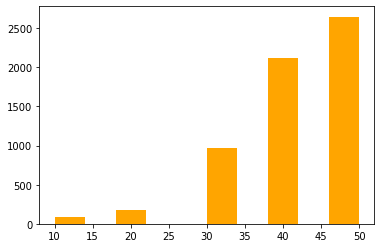

In [11]:
plt.hist(data['estrella'], color = "orange", lw=0)

In [ ]:
data['texto'] = data['texto'].str.strip()
data.head()

,estrella,texto,lugar
0,40,Abierto durante el dia normalment con alguien ...,recoleta
1,10,No se puede creer que un lugar historico y emb...,recoleta
2,40,Este cementerio esta ubicado en el corazon de ...,recoleta
3,30,"La iglesia y el cementerio de antaño, recomend...",recoleta
4,20,Con el correr del tiempo y el rapido crecimien...,recoleta


In [ ]:
from sklearn.model_selection import train_test_split
def my_train_test_split(x, y):
  
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
  return X_train, X_test, y_train, y_test

In [ ]:
data.head()
data_10 = data[data.estrella.eq(10)] 
data_20 = data[data.estrella.eq(20)]
data_30 = data[data.estrella.eq(30)] 
data_40 = data[data.estrella.eq(40)] 
data_50=  data[data.estrella.eq(50)] 
data_50.head()


,estrella,texto,lugar
8,50,Hay que estar atentos al Tour historico que of...,recoleta
11,50,El cementerio de La Recoleta es el mas tradici...,recoleta
14,50,El cementerio mas renombrado del pais por sus ...,recoleta
20,50,"Es un lugar interesante para visitar, puedes v...",recoleta
22,50,Luego visitaremos este cementerio. Ver las dif...,recoleta


In [ ]:
#X_train, X_test, y_train, y_test = []

#10
aux = data_10[data_10.estrella.eq(10)]
X_train10, X_test10, y_train10, y_test10 = my_train_test_split(aux[['texto', 'lugar']], aux["estrella"])

#20
aux = data_20[data_20.estrella.eq(20)]
X_train20, X_test20, y_train20, y_test20 = my_train_test_split(aux[['texto', 'lugar']], aux["estrella"])

#30
aux = data_30[data_30.estrella.eq(30)]
X_train30, X_test30, y_train30, y_test30 = my_train_test_split(aux[['texto', 'lugar']], aux["estrella"])


#40
aux = data_40[data_40.estrella.eq(40)]
X_train40, X_test40, y_train40, y_test40 = my_train_test_split(aux[['texto', 'lugar']], aux["estrella"])

#50
aux = data_50[data_50.estrella.eq(50)]
X_train50, X_test50, y_train50, y_test50 = my_train_test_split(aux[['texto', 'lugar']], aux["estrella"])



data_train_x = pd.concat([X_train10, X_train20, X_train30, X_train40, X_train50], axis=0)
data_test_x = pd.concat([X_test10, X_test20, X_test30, X_test40,X_test50] , axis=0)
data_train_y = pd.concat([y_train10, y_train20, y_train30, y_train40, y_train50], axis=0)
data_test_y = pd.concat([y_test10, y_test20, y_test30, y_test40,y_test50] , axis=0)
data_train = pd.concat([data_train_x, data_train_y] , axis=1)
data_test = pd.concat([data_test_x, data_test_y] , axis=1)


In [ ]:
start = 3
data_labels_train = data_train.estrella.values
data_labels_train[data_labels_train == 10] = 0
data_labels_train[data_labels_train == 20] = 0
data_labels_train[data_labels_train == 30] = 0
data_labels_train[data_labels_train == 40] = 1
data_labels_train[data_labels_train == 50] = 2

data_labels_test = data_test.estrella.values
data_labels_test[data_labels_test == 10] = 0
data_labels_test[data_labels_test == 20] = 0
data_labels_test[data_labels_test == 30] = 0
data_labels_test[data_labels_test == 40] = 1
data_labels_test[data_labels_test == 50] = 2

# Limpieza de los datos

In [ ]:
from bs4 import BeautifulSoup
import re
def normalize(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
    return s

def limpiar_texto(text):
  text = re.sub(r'^RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  return text

def clean_text(text):
    text = BeautifulSoup(text, "lxml").get_text()
    # Eliminamos la @ y su mención
    text = re.sub(r"@[A-Za-z0-9]+", ' ', text)
    # Eliminamos los links de las URLs
    text = re.sub(r"https?://[A-Za-z0-9./]+", ' ', text)
    # Nos quedamos solamente con los caracteres
    text = re.sub(r"\.\.?\.?\s?", ' ', text)
    text = re.sub('([A-Za-z])\,([A-Za-z])', '\\1, \\2', text)
    text = re.sub('([A-Za-z])\!([A-Za-z])', '\\1! \\2', text)
    text = re.sub(r"[^a-zA-ZñÑ.!?']", ' ', text)
    # Eliminamos espacios en blanco adicionales
    text = re.sub(r" +", ' ', text)
    text = text.lower()
    text = normalize(text)
    return text

In [ ]:
data_clean_train = [clean_text(text) for text in data_train['texto']]
data_clean_test = [clean_text(text) for text in data_test['texto']]

In [ ]:
data_train.iloc[1006]["texto"]

'Solo la recorrimos en automovil, es una zona nueva que se esta desarrollando, con zona para caminar y playa .'

In [ ]:
 data_clean_train[1006]

'solo la recorrimos en automovil es una zona nueva que se esta desarrollando con zona para caminar y playa '

#Tokenizacion

In [ ]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def create_bagWords(text):
  tokens = text.split()
  tokens = set(tokens)
  re_punc = re.compile('[%s]' % re.escape(string.punctuation))
  tokens = [re_punc.sub('', w) for w in tokens]
  tokens = [word for word in tokens if word.isalpha()]
  stop_words = set(stopwords.words('spanish'))
  tokens = [w for w in tokens if not w in stop_words]
  tokens = [word for word in tokens if len(word) > 1]
  return tokens

## Creación del vocabulario

In [ ]:
bagWords = []
for text in data_clean_train + data_clean_test:
  bagWords.append( create_bagWords(text))
bagWords[1]

['chozas',
 'inhumanas',
 'triste',
 'vivien',
 'mundo',
 'copan',
 'minimas',
 'cientos',
 'armado',
 'plaza',
 'espacios',
 'viven',
 'muchas',
 'sirvio',
 'ahi',
 'humanas',
 'baño',
 'hija',
 'condiciones',
 'vive',
 'lamentablemente',
 'niños',
 'bolsas',
 'mostrarle',
 'personas',
 'visita',
 'basura',
 'carpas']

In [ ]:
vocab = Counter()
for token in bagWords:
    vocab.update(token)

In [ ]:
print("Vocabulario Total del corpus: "+ str(len(vocab)))
# Imprimir las palabras principales en el vocabulario
print(vocab.most_common(20))
min_occurrence = 3
my_vocabs = [k for k,c in vocab.items() if c >= min_occurrence]
print("Vocabulario Optimizado del corpus: "+ str(len(my_vocabs)))

Vocabulario Total del corpus: 13533
[('lugar', 1789), ('mas', 1192), ('asuncion', 1053), ('si', 935), ('bien', 809), ('ciudad', 728), ('paraguay', 723), ('puede', 700), ('visita', 685), ('paseo', 620), ('pena', 590), ('ver', 587), ('centro', 538), ('visitar', 527), ('ir', 517), ('historia', 507), ('solo', 506), ('vale', 499), ('costanera', 491), ('rio', 473)]
Vocabulario Optimizado del corpus: 5038


In [ ]:
my_vocabs = set(my_vocabs)

##Construcción de una matriz de representacion de texto


In [ ]:
def clean_data_filter_vocab(text):
  tokens = create_bagWords(text)
  tokens = [w for w in tokens if w in my_vocabs]
  return ' '.join(tokens)

docs_clean_test = [clean_data_filter_vocab(text) for text in data_clean_test]
docs_clean_train = [clean_data_filter_vocab(text) for text in data_clean_train]
docs_clean_train[:10], data_labels_train[:10]

(['pena indigenas necesidades ocupada hacen',
  'triste mundo cientos armado plaza espacios viven muchas sirvio ahi baño hija condiciones vive lamentablemente niños bolsas personas visita basura carpas',
  'deberia punto ejemplo cuidada plaza estrategico gusta mal tan ser verdad centro',
  'abren lugar puertas si gusta olvidar san casas anda rapidamente observar vender cualquier loma geronimo ver cosa pobreza',
  'vecinos parecio llena experiencia comunes seguro mala casas llegar sitio admirar ubicacion ningun',
  'atardecer tranquila bahia cerca pueden tambien caminata lugar excelente hermoso ciclismo apreciar barcos',
  'definitivamente lugar mas abandonada solo tour sola caso area ir centro ver mejor',
  'tantas paraguayas ambulantes puestos cuidado parece jardineria van plazas sucias llenas comerciantes',
  'dejado horrible carteles lugar justo verg existen adentro unas alrededor encanto dio lado enero orgullo pareja verdad perimetro anteriores desorganizado llevar veces',
  'calle

In [ ]:
try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

from tensorflow.keras import layers
import tensorflow_datasets as tfds

In [ ]:
from keras.preprocessing.text import Tokenizer
def create_tokenizer(docs):
 tokenizer = Tokenizer()
 tokenizer.fit_on_texts(docs)
 return tokenizer

In [ ]:
tokenizer = create_tokenizer(docs_clean_train)
# codificar datos
X_trainToken = tokenizer.texts_to_matrix(docs_clean_train, mode='freq')
X_testToken = tokenizer.texts_to_matrix(docs_clean_test, mode='freq')
print("Vector-Documento del tamaño: "+ str(len(X_trainToken[0])))
for i, j  in enumerate(X_trainToken[0]):
  if j > 0:
    print(i, j)

Vector-Documento del tamaño: 5008
11 0.2
250 0.2
461 0.2
1786 0.2
2269 0.2


# Construcción del Modelo - Bolsa de Palabras

In [ ]:
from keras.utils.vis_utils import plot_model
from keras.models import Sequential

from keras.layers import Dense, Dropout
def define_model(n_words, start):
    if start == 2:
      activation = 'sigmoid'
      loss = 'binary_crossentropy'
      start = 1
    else:
      activation = 'softmax'
      loss = 'sparse_categorical_crossentropy'
    # definir la red
    model = Sequential()
    model.add(Dense(50, input_shape=(n_words,), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, input_shape=(n_words,), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(start, activation=activation))


    # compilar la red
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    # resumir el modelo definido
    model.summary()
    plot_model(model, to_file='model_1.png', show_shapes=True)
    return model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def show_image(path):
  img = mpimg.imread(path)
  plt.figure(figsize=(8,10))
  imgplot = plt.imshow(img)
  plt.show()


(4207, 5008) (4207,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                250450    
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               6528      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 257,107
Trainable params: 257,107
Non-trainable params: 0
_________________________________________________________________
Epoch 1/7
132/132 - 1s - loss: 0.5292 - accuracy: 0.7920
Epoch 2/7
132/132 - 1s - loss: 0.4323 

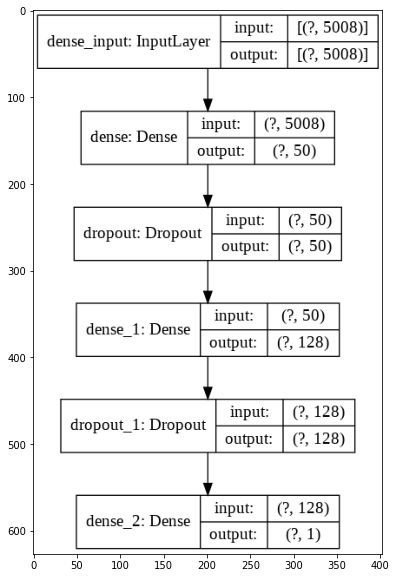

In [ ]:
n_words = X_testToken.shape[1]
print(X_trainToken.shape, data_labels_train.shape)
model = define_model(n_words, start)
# red adecuada
model.fit(X_trainToken, data_labels_train, epochs=7, verbose=2)
show_image('model_1.png')

In [ ]:
# evaluar
loss, acc = model.evaluate(X_testToken, data_labels_test, verbose=0)
print('Precision del Test: %f' % (acc*100))

Precision del Test: 81.672204


Resultado del Modelo - Bolsa de Palabras

In [ ]:
def predict_text(text, tokenizer, start):
  print(text)
  text = clean_text(text)
  text = clean_data_filter_vocab(text)
  encoded = tokenizer.texts_to_matrix([text], mode='freq')
  yhat = model.predict(encoded, verbose=0)
  yhat = yhat.reshape( start -1, 1)
  yhat = [print(i* 100) for i in yhat]

text = 'El lugar es muy sucio e inseguro'

result  = predict_text(text, tokenizer, start)


text = 'Excelente lugar, atencion de calidad'
result  = predict_text(text, tokenizer, start)


text = 'Horrible experiencia, es muy chico y no se puede estar mucho tiempo'
result  = predict_text(text, tokenizer, start)


text = 'El lugar es agradable pero muy caluroso, ya que casi no hay sombras lo que hace que sea insoportable estar mucho tiempo'
result  = predict_text(text, tokenizer, start)

El lugar es muy sucio e inseguro


AssertionError: ignored

# Construcción del Modelo - Embeddings

## Construcción modelo n-grams

In [ ]:
# calcular la longitud máxima del documento
def max_length(docs):
  max = -999
  data_max = []
  for i,s in enumerate(docs):
    if len(s.split()) > max:
      max = len(s.split())
      data_max.clear()
      data_max.append([max, s[:100], i])

  return data_max[0]

data_max = max_length(data_clean_train)
length = data_max[0]
print(data_max)

[528, 'les voy a contar por que no pude visitar el parque nacional ybycui no fue por falta de ganas o predi', 26]


In [ ]:
data_clean_train = [clean_text(text) for text in data_train['texto']]
data_clean_test = [clean_text(text) for text in data_test['texto']]
tokenizer = create_tokenizer(data_clean_train)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

11699


In [ ]:
# codificar una lista de líneas
from keras.preprocessing.sequence import pad_sequences
def encode_text(tokenizer, doc, length):
 # codificación entera
 encoded = tokenizer.texts_to_sequences(doc)
 # secuencias codificadas por pads
 padded = pad_sequences(encoded, maxlen=length, padding='post')
 return padded

In [ ]:
trainX = encode_text(tokenizer, data_clean_train, length)
print(trainX.shape)

(4207, 528)


In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
# definir el modelo
def define_model(length, vocab_size, embedding_dim, nro_filter, dropout_rate, start):
  pool =  MaxPooling1D(pool_size=2)
  # canal 1
  inputs1 = Input(shape=(length,))
  embedding1 = Embedding(vocab_size, embedding_dim)(inputs1)
  sixgram = Conv1D(filters=nro_filter, kernel_size=6, activation='relu')(embedding1)
  drop1 = Dropout(dropout_rate)(sixgram)
  x = pool(drop1)
  flat1 = Flatten()(x)
  # canal 2
  inputs2 = Input(shape=(length,))
  embedding2 = Embedding(vocab_size, embedding_dim)(inputs2)
  eigthgram = Conv1D(filters=nro_filter, kernel_size=8, activation='relu')(embedding2)
  drop2 = Dropout(dropout_rate)(eigthgram)
  x = pool(drop2)
  flat2 = Flatten()(x)
 
  # canal 3
  inputs3 = Input(shape=(length,))
  embedding3 = Embedding(vocab_size, embedding_dim)(inputs3)
  tengram = Conv1D(filters=nro_filter, kernel_size=10, activation='relu')(embedding3)
  drop3 = Dropout(dropout_rate)(tengram)
  x = pool(drop3)
  flat3 = Flatten()(x)
  # unión
  merged = concatenate([flat1, flat2, flat3])
  # interpretacion
  dense2 = Dense(512, activation='relu')(merged)
  if start == 2:
    activation = 'sigmoid'
    loss = 'binary_crossentropy'
    start = 1
  else:
    activation = 'softmax'
    loss = 'sparse_categorical_crossentropy'


  
  outputs = Dense(start, activation=activation)(dense2)
  model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
  # compilar
  model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
  # resumen
  model.summary()
  plot_model(model, show_shapes=True, to_file='model_2.png')
  return model

In [ ]:
model = define_model(length, vocab_size, 32, 15, 0.1, start)
model.fit([trainX,trainX,trainX], data_labels_train, epochs=4, batch_size=128)
model.save('model.h5')

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 528)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 528)]        0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 528)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 528, 32)      374368      input_1[0][0]                    
_______________________________________________________________________________________

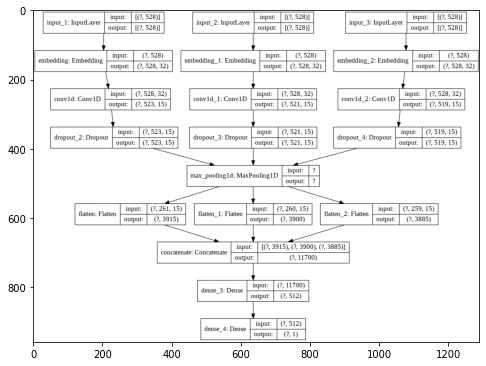

In [ ]:
show_image('model_2.png')

In [ ]:
from keras.models import load_model
model = load_model('model.h5')
testX = encode_text(tokenizer, docs_clean_test, length)
loss, acc = model.evaluate([testX,testX,testX], data_labels_test, verbose=0)
print('Accuracy de la prueba: %.2f' % (acc*100))

Accuracy de la prueba: 77.74


In [ ]:
data_labels_test[0], docs_clean_test[0], data_test.head()

In [ ]:
text = 'El lugar es muy sucio e inseguro'
xResult = encode_text(tokenizer, [text], length)
result = model.predict([xResult, xResult, xResult])
print(result)


text = 'Excelente lugar, atencion de calidad'
xResult = encode_text(tokenizer, [text], length)
result = model.predict([xResult, xResult, xResult])
print(result)


text = 'Horrible experiencia, es muy chico y no se puede estar mucho tiempo'
xResult = encode_text(tokenizer, [text], length)
result = model.predict([xResult, xResult, xResult])
print(result)

text = 'El lugar es agradable pero muy caluroso, ya que casi no hay sombras lo que hace que sea insoportable estar mucho tiempo'
xResult = encode_text(tokenizer, [text], length)
result = model.predict([xResult, xResult, xResult])
print(result[0])

[[0.8499438  0.09867679 0.05137934]]
[[0.83171    0.09708177 0.07120814]]
[[0.60630435 0.32182738 0.07186824]]
[0.4368877  0.47369394 0.08941838]
